# **Call of Duty Warzone**

Import required libraries for analysis.

In [245]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

Import all .csv datasets collected with MSI afterburner.

In [246]:
max_settings_rtx_off = pd.read_csv('CoD_W_Max_Settings_No_Ray_Tracing.csv', sep = '\s*,\s*')
max_settings_rtx_on = pd.read_csv('CoD_W_Max_Settings_RTX_On.csv', sep = '\s*,\s*')

In [247]:
max_settings_rtx_off.drop(max_settings_rtx_off.columns[[0, 1, 5, 6, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68]], axis = 1, inplace = True)
max_settings_rtx_off.drop(max_settings_rtx_off[max_settings_rtx_off['GPU usage'] < 98].index, inplace = True)
max_settings_rtx_off.drop(max_settings_rtx_off[max_settings_rtx_off['Frametime'] == 0].index, inplace = True)
max_settings_rtx_off.drop(max_settings_rtx_off[max_settings_rtx_off['Frametime'] > 50].index, inplace = True)

max_settings_rtx_on.drop(max_settings_rtx_on.columns[[0, 1, 5, 6, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68]], axis = 1, inplace = True)
max_settings_rtx_on.drop(max_settings_rtx_on[max_settings_rtx_on['GPU usage'] < 98].index, inplace = True)
max_settings_rtx_on.drop(max_settings_rtx_on[max_settings_rtx_on['Frametime'] == 0].index, inplace = True)
max_settings_rtx_on.drop(max_settings_rtx_on[max_settings_rtx_on['Frametime'] > 50].index, inplace = True)

Print a summary to understand the data. 

In [248]:
max_settings_rtx_off.describe()

,GPU temperature,GPU usage,FB usage,Memory usage,Core clock,Memory clock,Power,Temp limit,Power limit,Voltage limit,No load limit,CPU temperature,CPU usage,RAM usage,Framerate,Frametime
count,335.000000,335.000000,335.000000,335.000000,335.000000,3.350000e+02,335.000000,335.0,335.000000,335.000000,335.0,335.000000,335.000000,335.000000,335.000000,335.000000
mean,65.671642,98.856716,33.555224,7628.171848,1930.970149,7.000983e+03,97.000000,0.0,0.853731,0.770149,0.0,62.065672,37.119818,14784.483582,134.005672,10.259863
std,0.777453,0.350886,2.248571,101.275756,8.282024,9.108552e-13,3.210201,0.0,0.353904,0.421366,0.0,2.161555,4.347508,150.382981,10.434498,2.395047
min,63.000000,98.000000,28.000000,7393.625000,1890.000000,7.000983e+03,86.000000,0.0,0.000000,0.000000,0.0,56.000000,23.516000,14278.000000,110.200000,7.275000
25%,65.000000,99.000000,32.000000,7567.188000,1935.000000,7.000983e+03,95.000000,0.0,1.000000,1.000000,0.0,61.000000,34.344000,14753.000000,127.200000,9.147000
50%,66.000000,99.000000,33.000000,7696.938000,1935.000000,7.000983e+03,97.000000,0.0,1.000000,1.000000,0.0,62.000000,36.953000,14825.000000,134.000000,9.948000
75%,66.000000,99.000000,35.000000,7696.938000,1935.000000,7.000983e+03,99.000000,0.0,1.000000,1.000000,0.0,63.000000,39.621000,14881.000000,141.750000,10.968500
max,67.000000,99.000000,38.000000,7696.938000,1935.000000,7.000983e+03,107.000000,0.0,1.000000,1.000000,0.0,72.000000,49.873000,14961.000000,164.400000,43.662000


In [249]:
max_settings_rtx_on.describe()

,GPU temperature,GPU usage,FB usage,Memory usage,Core clock,Memory clock,Power,Temp limit,Power limit,Voltage limit,No load limit,CPU temperature,CPU usage,RAM usage,Framerate,Frametime
count,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,424.000000,424.0,424.000000,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000
mean,67.759434,98.889151,33.089623,7566.094830,1926.863208,7.000983e+03,97.808962,0.0,0.978774,0.537736,0.0,64.042453,34.390500,15798.908019,131.799292,10.042724
std,0.531429,0.321749,3.103645,102.263342,11.467713,9.105691e-13,2.712168,0.0,0.144309,0.499163,0.0,1.964963,4.648933,61.497726,13.107723,1.471899
min,64.000000,98.000000,17.000000,7204.891000,1860.000000,7.000983e+03,85.000000,0.0,0.000000,0.000000,0.0,57.000000,18.306000,15674.000000,76.500000,7.337000
25%,68.000000,99.000000,32.000000,7617.703000,1920.000000,7.000983e+03,96.000000,0.0,1.000000,0.000000,0.0,63.000000,31.549250,15754.000000,126.375000,9.011000
50%,68.000000,99.000000,33.000000,7617.703000,1935.000000,7.000983e+03,98.000000,0.0,1.000000,1.000000,0.0,64.000000,34.514500,15788.000000,133.150000,9.861000
75%,68.000000,99.000000,35.000000,7617.703000,1935.000000,7.000983e+03,100.000000,0.0,1.000000,1.000000,0.0,65.000000,37.577500,15815.000000,138.925000,10.642750
max,68.000000,100.000000,39.000000,7617.703000,1950.000000,7.000983e+03,104.000000,0.0,1.000000,1.000000,0.0,73.000000,48.594000,15944.000000,164.400000,23.113000


In [250]:
low_framerates = max_settings_rtx_on[max_settings_rtx_on['Framerate'] < 100]
low_framerates.describe()

,GPU temperature,GPU usage,FB usage,Memory usage,Core clock,Memory clock,Power,Temp limit,Power limit,Voltage limit,No load limit,CPU temperature,CPU usage,RAM usage,Framerate,Frametime
count,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.0,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000
mean,65.769231,98.769231,21.000000,7261.506385,1944.230769,7.000983e+03,93.076923,0.0,0.769231,0.923077,0.0,61.384615,23.801769,15812.076923,84.569231,14.713538
std,0.725011,0.599145,2.345208,75.221383,13.045777,9.466321e-13,2.722179,0.0,0.438529,0.277350,0.0,2.873397,3.413375,48.820183,7.624017,2.667667
min,64.000000,98.000000,17.000000,7204.891000,1905.000000,7.000983e+03,89.000000,0.0,0.000000,0.000000,0.0,57.000000,18.306000,15745.000000,76.500000,12.288000
25%,66.000000,98.000000,19.000000,7204.891000,1950.000000,7.000983e+03,91.000000,0.0,1.000000,1.000000,0.0,59.000000,21.563000,15790.000000,78.900000,13.810000
50%,66.000000,99.000000,21.000000,7204.891000,1950.000000,7.000983e+03,93.000000,0.0,1.000000,1.000000,0.0,61.000000,23.645000,15804.000000,83.900000,14.099000
75%,66.000000,99.000000,22.000000,7332.891000,1950.000000,7.000983e+03,95.000000,0.0,1.000000,1.000000,0.0,63.000000,25.156000,15824.000000,90.200000,14.418000
max,67.000000,100.000000,25.000000,7364.891000,1950.000000,7.000983e+03,98.000000,0.0,1.000000,1.000000,0.0,66.000000,31.250000,15899.000000,98.400000,23.113000


Calculate the framerate 1% and 0.1% lows to assess potential micro stutter

In [251]:
max_set_rtx_off_1pct = np.quantile(max_settings_rtx_off['Framerate'], 0.01)
max_set_rtx_off_01pct = np.quantile(max_settings_rtx_off['Framerate'], 0.001)

max_set_rtx_on_1pct = np.quantile(max_settings_rtx_on['Framerate'], 0.01)
max_set_rtx_on_01pct = np.quantile(max_settings_rtx_on['Framerate'], 0.001)

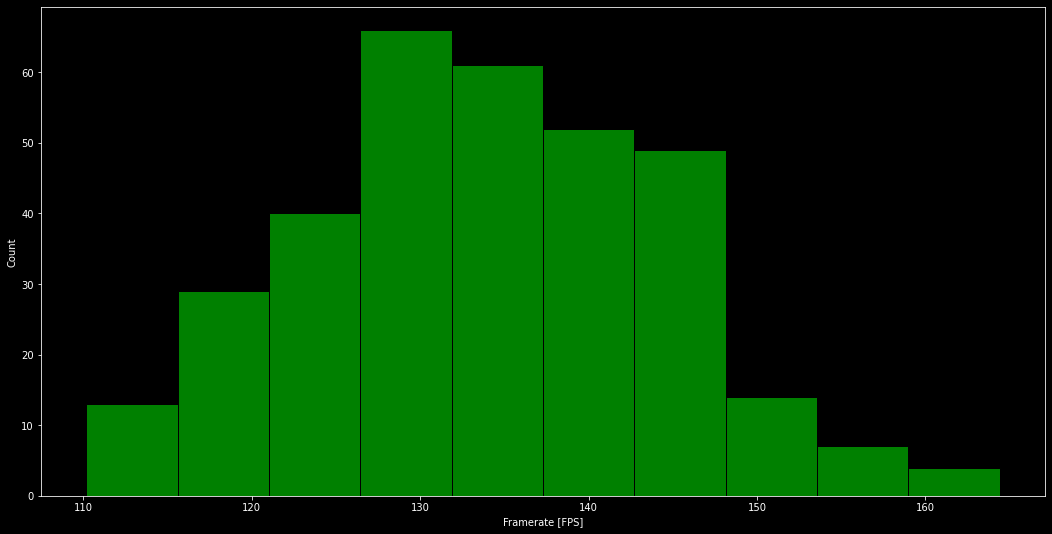

In [252]:
plt.figure(figsize = (18, 9))
plt.style.use('dark_background')
plt.hist(max_settings_rtx_off['Framerate'], color = 'g', edgecolor = 'black')
plt.xlabel('Framerate [FPS]')
plt.ylabel('Count')
plt.show()

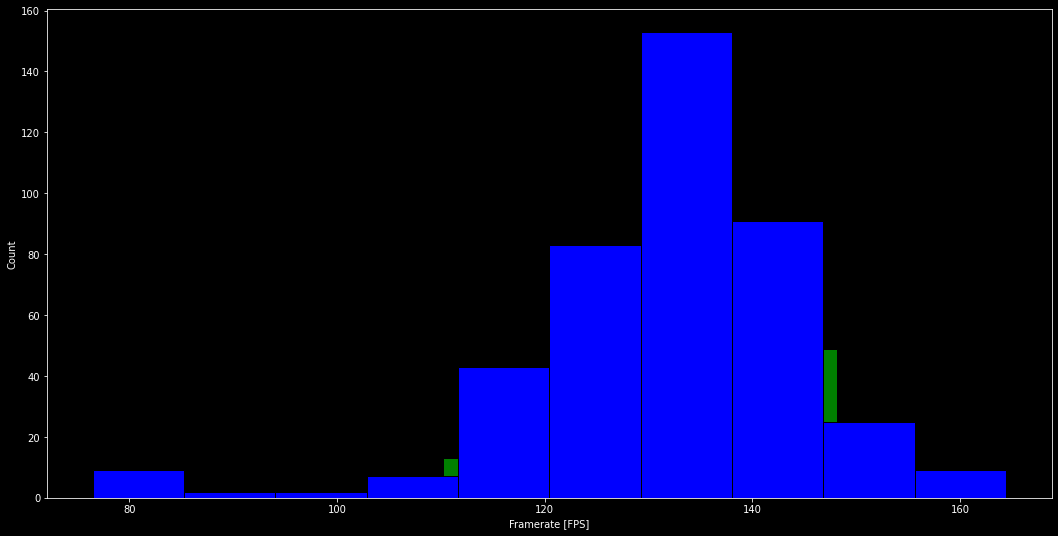

In [253]:
plt.figure(figsize = (18, 9))
plt.style.use('dark_background')

plt.subplot(111)
plt.hist(max_settings_rtx_off['Framerate'], color = 'g', edgecolor = 'black')
plt.xlabel('Framerate [FPS]')
plt.ylabel('Count')

plt.subplot(111)
plt.hist(max_settings_rtx_on['Framerate'], color = 'blue', edgecolor = 'black')
plt.xlabel('Framerate [FPS]')
plt.ylabel('Count')

plt.show()